In [2]:
pip install numpy

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install PyMySQL

  Using cached https://files.pythonhosted.org/packages/ed/39/15045ae46f2a123019aa968dfcba0396c161c20f855f11dea6796bcaae95/PyMySQL-0.9.3-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sqlalchemy import create_engine
import pymysql
from brokenaxes import brokenaxes

In [3]:
engine = create_engine("mysql+pymysql://root:" + os.environ.get("mysql_key") + '@localhost:3306/airflow_project')

In [4]:
abb_vis_df = pd.read_sql('select * from airflow_project.nyc_abb', con=engine)
abb_vis_df.head()

,index,Unnamed: 0,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0,0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,1,1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,2,2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3,3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,4,4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### more detail data cleaning

In [5]:
abb_vis_df.loc[abb_vis_df['reviews_per_month'].isnull(), 'reviews_per_month'] = 0

In [6]:
abb_vis_df = abb_vis_df.loc[:, ~ abb_vis_df.columns.str.contains('^Unnamed')]

In [7]:
abb_vis_df = abb_vis_df[abb_vis_df['price']>0]

In [8]:
abb_vis_df = abb_vis_df[abb_vis_df['minimum_nights']<=365]

In [9]:
abb_vis_df = abb_vis_df.set_index('host_id')

In [10]:
abb_vis_df.drop(columns=['index']).head()

,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,,,,,,,,,,,
2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [11]:
abb_vis_df.shape

(48870, 12)

In [12]:
abb_vis_df.dtypes

index                               int64
borough                            object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [13]:
abb_vis_df.isnull().sum()

index                             0
borough                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

### Example using SQL query to pull out data

In [14]:
# More Visualization from SQL query
connection = engine.connect()

In [15]:
# Average Price of Airbnb in NYC /night
avg_abb_price = connection.execute('SELECT AVG(price) FROM airflow_project.nyc_abb')

In [16]:
data_avg_abb_price = [row for row in avg_abb_price]
df_avg_abb_price = pd.DataFrame.from_records(data_avg_abb_price)
df_avg_abb_price.columns = ['Average price/night of Airbnb in NYC 2019']
df_avg_abb_price

,Average price/night of Airbnb in NYC 2019
0,152.7207


In [17]:
# Average Price of Airbnb in NYC /night (Manhattan) 
avg_abb_price_M = connection.execute('SELECT AVG(price) \
                                     FROM airflow_project.nyc_abb \
                                     WHERE borough = "Manhattan"')

In [18]:
data_avg_abb_price_M = [row for row in avg_abb_price_M]
df_avg_abb_price_M = pd.DataFrame.from_records(data_avg_abb_price_M)
df_avg_abb_price_M.columns = ['Average price/night of Airbnb in NYC 2019 (Manhattan)']
df_avg_abb_price_M

,Average price/night of Airbnb in NYC 2019 (Manhattan)
0,196.8758


In [19]:
# Average Price of Airbnb in NYC /night (Queens) 
avg_abb_price_Q = connection.execute('SELECT AVG(price) \
                                     FROM airflow_project.nyc_abb\
                                     WHERE borough = "Queens"')

In [20]:
data_avg_abb_price_Q = [row for row in avg_abb_price_Q]
df_avg_abb_price_Q = pd.DataFrame.from_records(data_avg_abb_price_Q)
df_avg_abb_price_Q.columns = ['Average price/night of Airbnb in NYC 2019 (Queens)']
df_avg_abb_price_Q

,Average price/night of Airbnb in NYC 2019 (Queens)
0,99.5176


In [21]:
#Total Number of review
sum_abb_reviews = connection.execute('SELECT SUM(number_of_reviews)\
                                        FROM airflow_project.nyc_abb')

In [22]:
data_sum_abb_reviews = [row for row in sum_abb_reviews]
df_sum_abb_reviews = pd.DataFrame.from_records(data_sum_abb_reviews)
df_sum_abb_reviews.columns = ['Total nunber of reviews for Airbnb housing in NYC 2019']
df_sum_abb_reviews

,Total nunber of reviews for Airbnb housing in NYC 2019
0,1138005


### Next, we will look at the price distribution by the different boroughs

In [23]:
abb_vis_df.borough.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [24]:
set(abb_vis_df['borough'])

{'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'}

In [25]:
#The price/night for each borough
abb_vis_df.groupby('borough')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,1090.0,87.58,106.73,10.0,45.0,65.0,99.0,2500.0
Brooklyn,20089.0,124.45,186.92,10.0,60.0,90.0,150.0,10000.0
Manhattan,21654.0,196.89,291.42,10.0,95.0,150.0,220.0,10000.0
Queens,5664.0,99.49,167.13,10.0,50.0,75.0,110.0,10000.0
Staten Island,373.0,114.81,277.62,13.0,50.0,75.0,110.0,5000.0


In [26]:
#The minimum nights for each borough
abb_vis_df.groupby('borough')['minimum_nights'].describe()

,count,mean,std,min,25%,50%,75%,max
borough,,,,,,,,
Bronx,1090.0,4.563303,15.638775,1.0,1.0,2.0,3.0,365.0
Brooklyn,20089.0,5.894569,14.533385,1.0,2.0,3.0,5.0,365.0
Manhattan,21654.0,8.345617,18.824170,1.0,1.0,3.0,6.0,365.0
Queens,5664.0,5.010240,11.952636,1.0,1.0,2.0,3.0,365.0
Staten Island,373.0,4.831099,19.727605,1.0,1.0,2.0,3.0,365.0


In [28]:
#Pivot table, five boroughs
abb_vis_df_pt = abb_vis_df.pivot_table(index='borough', columns='room_type', values='price', aggfunc='mean')
abb_vis_df_pt.round(2)

room_type,Entire home/apt,Private room,Shared room
borough,,,
Bronx,127.51,66.89,59.80
Brooklyn,178.36,76.55,50.77
Manhattan,249.28,116.78,88.93
Queens,147.03,71.76,69.02
Staten Island,173.85,62.29,57.44


### Now, let's  combine dataset by counting data from five boroughs

#### NYC Airbnb Housing Data Count Summary

In [29]:
abb_borough_count = abb_vis_df.groupby('borough').borough.count()
abb_borough_count

borough
Bronx             1090
Brooklyn         20089
Manhattan        21654
Queens            5664
Staten Island      373
Name: borough, dtype: int64

#### NYC Park Data Count Summary

In [30]:
nyc_park_vis_df = pd.read_sql('select * from airflow_project.nyc_park', con=engine)
nyc_park_vis_df.head()

,index,borough,acres,typecatego,waterfront
0,0,R,20.907,Neighborhood Park,Yes
1,1,Q,0.061,Triangle/Plaza,No
2,2,B,1.130,Playground,No
3,3,X,2.160,Neighborhood Park,No
4,4,X,1.104,Jointly Operated Playground,No


In [31]:
#Rename  B = Broonlyn, X = Bronx, M = Manhattan,  Q = Queens,R = Staten Island,
nyc_park_vis_df.loc[nyc_park_vis_df.borough == 'B', 'borough'] = 'Brooklyn'
nyc_park_vis_df.loc[nyc_park_vis_df.borough == 'X', 'borough'] = 'Bronx'
nyc_park_vis_df.loc[nyc_park_vis_df.borough == 'M', 'borough'] = 'Manhattan'
nyc_park_vis_df.loc[nyc_park_vis_df.borough == 'Q', 'borough'] = 'Queens'
nyc_park_vis_df.loc[nyc_park_vis_df.borough == 'R', 'borough'] = 'Staten Island'

In [32]:
nyc_park_vis_df.head()

,index,borough,acres,typecatego,waterfront
0,0,Staten Island,20.907,Neighborhood Park,Yes
1,1,Queens,0.061,Triangle/Plaza,No
2,2,Brooklyn,1.130,Playground,No
3,3,Bronx,2.160,Neighborhood Park,No
4,4,Bronx,1.104,Jointly Operated Playground,No


In [33]:
park_borough_count = nyc_park_vis_df.groupby('borough').borough.count()
park_borough_count

borough
Bronx            390
Brooklyn         610
Manhattan        386
Queens           469
Staten Island    160
Name: borough, dtype: int64

#### NYC Hot Spot Data Count Summary

In [34]:
nyc_hot_spot_df = pd.read_sql('select * from airflow_project.nyc_hot_spot', con=engine)
nyc_hot_spot_df.head()

,index,type,provider,latitude,longitude,city,activated,borough_code,borough
0,0,Free,LinkNYC - Citybridge,40.684061,-73.870537,Brooklyn,11/21/2017 12:00:00 AM +0000,3,Brooklyn
1,1,Free,LinkNYC - Citybridge,40.684625,-73.868975,Brooklyn,11/21/2017 12:00:00 AM +0000,3,Brooklyn
2,2,Free,LinkNYC - Citybridge,40.684702,-73.868309,Brooklyn,11/21/2017 12:00:00 AM +0000,3,Brooklyn
3,3,Free,LinkNYC - Citybridge,40.685131,-73.866777,Brooklyn,12/20/2017 12:00:00 AM +0000,3,Brooklyn
4,4,Free,LinkNYC - Citybridge,40.676475,-73.897167,Brooklyn,02/06/2018 12:00:00 AM +0000,3,Brooklyn


In [35]:
hot_spot_borough_count = nyc_hot_spot_df.groupby('borough').borough.count()
hot_spot_borough_count

borough
Bronx             316
Brooklyn          700
Manhattan        1672
Queens            531
Staten Island     100
Name: borough, dtype: int64

#### NYC Hotel  Data Count Summary

In [36]:
nyc_hotel_vis_df = pd.read_sql('select * from airflow_project.nyc_hotel', con=engine)
nyc_hotel_vis_df.head()

,index,postcode,borough,latitude,longitude
0,0,10004,MANHATTAN,40.703235,-74.012421
1,1,10004,MANHATTAN,40.702744,-74.012201
2,2,10004,MANHATTAN,40.704025,-74.012638
3,3,10004,MANHATTAN,40.704039,-74.012317
4,4,10282,MANHATTAN,40.714812,-74.016153


In [37]:
nyc_hotel_vis_df.loc[nyc_hotel_vis_df.borough == 'BROOKLYN', 'borough'] = 'Brooklyn'
nyc_hotel_vis_df.loc[nyc_hotel_vis_df.borough == 'BRONX', 'borough'] = 'Bronx'
nyc_hotel_vis_df.loc[nyc_hotel_vis_df.borough == 'MANHATTAN', 'borough'] = 'Manhattan'
nyc_hotel_vis_df.loc[nyc_hotel_vis_df.borough == 'QUEENS', 'borough'] = 'Queens'
nyc_hotel_vis_df.loc[nyc_hotel_vis_df.borough == 'STATEN IS', 'borough'] = 'Staten Island'

In [38]:
nyc_hotel_vis_df.head()

,index,postcode,borough,latitude,longitude
0,0,10004,Manhattan,40.703235,-74.012421
1,1,10004,Manhattan,40.702744,-74.012201
2,2,10004,Manhattan,40.704025,-74.012638
3,3,10004,Manhattan,40.704039,-74.012317
4,4,10282,Manhattan,40.714812,-74.016153


In [39]:
hotel_borough_count = nyc_hotel_vis_df.groupby('borough').borough.count()
hotel_borough_count

borough
Bronx              73
Brooklyn          177
Manhattan        2250
Queens            209
Staten Island      17
Name: borough, dtype: int64

#### NYC Shooting Data Count Summary

In [40]:
nyc_shooting_vis_df = pd.read_sql('select * from airflow_project.nyc_shooting', con=engine)
nyc_shooting_vis_df.head()

,index,occur_date,occur_time,borough,precinct,vic_sex,latitude,longitude
0,0,12/31/2019,23:15:00,MANHATTAN,28,M,40.800244,-73.953390
1,1,12/31/2019,20:14:00,BROOKLYN,73,M,40.660527,-73.917156
2,2,12/30/2019,21:29:00,BROOKLYN,71,M,40.656923,-73.939647
3,3,12/30/2019,03:17:00,BROOKLYN,81,M,40.686815,-73.919370
4,4,12/30/2019,03:17:00,BROOKLYN,81,M,40.686815,-73.919370


In [41]:
nyc_shooting_vis_df.loc[nyc_shooting_vis_df.borough == 'BROOKLYN', 'borough'] = 'Brooklyn'
nyc_shooting_vis_df.loc[nyc_shooting_vis_df.borough == 'BRONX', 'borough'] = 'Bronx'
nyc_shooting_vis_df.loc[nyc_shooting_vis_df.borough == 'MANHATTAN', 'borough'] = 'Manhattan'
nyc_shooting_vis_df.loc[nyc_shooting_vis_df.borough == 'QUEENS', 'borough'] = 'Queens'
nyc_shooting_vis_df.loc[nyc_shooting_vis_df.borough == 'STATEN ISLAND', 'borough'] = 'Staten Island'

In [42]:
shooting_borough_count = nyc_shooting_vis_df.groupby('borough').borough.count()
shooting_borough_count

borough
Bronx            266
Brooklyn         372
Manhattan        145
Queens           158
Staten Island     26
Name: borough, dtype: int64

#### NYC Public Housing Data Count Summary

In [43]:
pb_houing_vis_df = pd.read_sql('select * from airflow_project.nyc_housing', con=engine)
pb_houing_vis_df.head()

,index,project_id,borough,extremely_low_income_units,very_low_income_units,low_income_units,moderate_income_units,middle_income_units,other_income_units,total_units
0,0,68894,Bronx,0,0,44,0,0,0,44
1,1,67286,Queens,24,92,114,0,0,1,231
2,2,67286,Queens,8,34,43,0,0,0,85
3,3,67693,Manhattan,49,8,2,1,0,0,60
4,4,67693,Manhattan,36,8,3,4,0,1,52


In [44]:
pb_houing_borough_count = pb_houing_vis_df.groupby('borough').borough.count()
pb_houing_borough_count

borough
Bronx            1008
Brooklyn         1862
Manhattan         802
Queens            491
Staten Island     221
Name: borough, dtype: int64

In [45]:
count_sum_df = pd.concat([abb_borough_count, park_borough_count,hot_spot_borough_count,
                    hotel_borough_count,shooting_borough_count,pb_houing_borough_count], axis = 1 )

In [46]:
count_sum_df.columns= ['airbnb', 'park', 'hot spot', 'hotel', 'shooting', 'public housing']

In [47]:
count_sum_df

,airbnb,park,hot spot,hotel,shooting,public housing
borough,,,,,,
Bronx,1090,390,316,73,266,1008
Brooklyn,20089,610,700,177,372,1862
Manhattan,21654,386,1672,2250,145,802
Queens,5664,469,531,209,158,491
Staten Island,373,160,100,17,26,221


### Data visulization

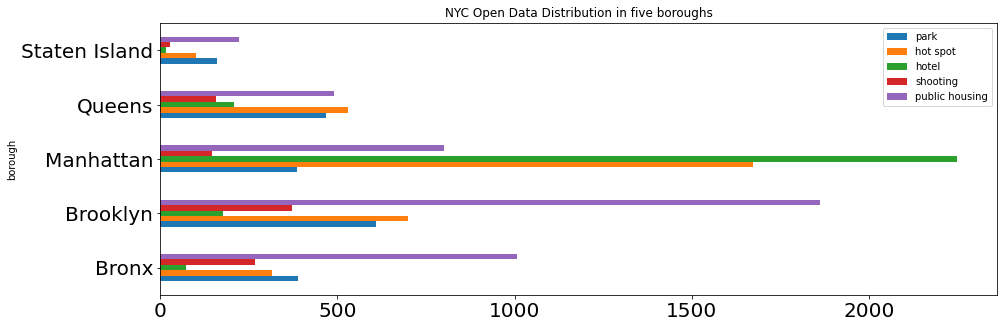

In [48]:
count_sum_df.drop('airbnb', axis=1).plot(kind = 'barh', legend = True, style = 'ggplot',figsize=(15,5), fontsize= 20, title='NYC Open Data Distribution in five boroughs')

Text(0.5, 1.0, 'NYC - Public Housing')

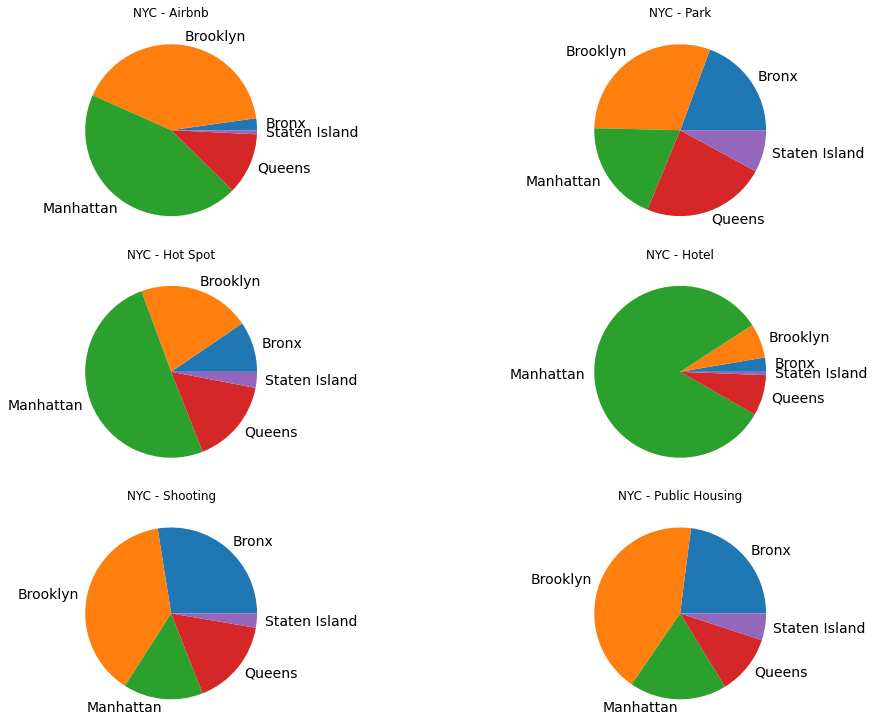

In [50]:
# subplot
import matplotlib as mpl

fig,ax=plt.subplots(3,2, figsize=(14, 10), constrained_layout=True)


ax[0,0].pie(count_sum_df['airbnb'], labels = ['Bronx', 'Brooklyn', "Manhattan", 'Queens', 'Staten Island'], 
            textprops={'fontsize': 14})
ax[0,0].set_title('NYC - Airbnb')


ax[0,1].pie(count_sum_df['park'], labels = ['Bronx', 'Brooklyn', "Manhattan", 'Queens', 'Staten Island'],
           textprops={'fontsize': 14})
ax[0,1].set_title('NYC - Park')

ax[1,0].pie(count_sum_df['hot spot'], labels = ['Bronx', 'Brooklyn', "Manhattan", 'Queens', 'Staten Island'],
           textprops={'fontsize': 14})
ax[1,0].set_title('NYC - Hot Spot')

ax[1,1].pie(count_sum_df['hotel'], labels = ['Bronx', 'Brooklyn', "Manhattan", 'Queens', 'Staten Island'],
           textprops={'fontsize': 14})
ax[1,1].set_title('NYC - Hotel')

ax[2,0].pie(count_sum_df['shooting'], labels = ['Bronx', 'Brooklyn', "Manhattan", 'Queens', 'Staten Island'],
           textprops={'fontsize': 14})
ax[2,0].set_title('NYC - Shooting')

ax[2,1].pie(count_sum_df['public housing'], labels = ['Bronx', 'Brooklyn', "Manhattan", 'Queens', 'Staten Island'],
           textprops={'fontsize': 14})
ax[2,1].set_title('NYC - Public Housing')

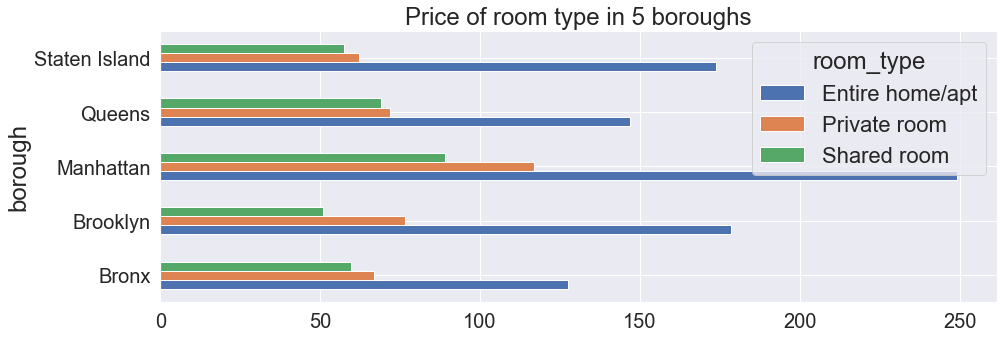

In [169]:
abb_vis_df_pt.plot(kind = 'barh', legend = True, style = 'ggplot',figsize=(15,5), fontsize= 20, title='Price of room type in 5 boroughs')

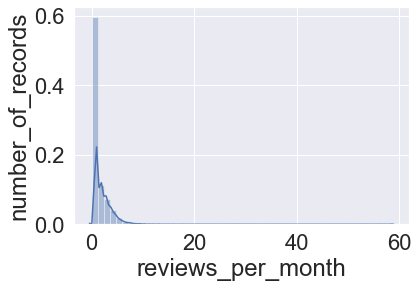

In [170]:
#All houses get few reviews per month
sns.distplot(abb_vis_df['reviews_per_month'])
plt.ylabel('number_of_records')
plt.show()

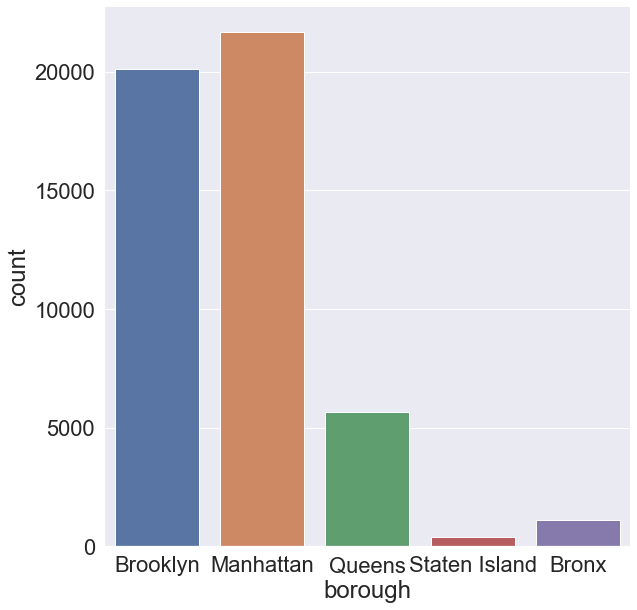

In [174]:
# Airbnb Location by Borough Vis
sns.catplot('borough', data=abb_vis_df, kind = 'count', height =9, aspect = 1)

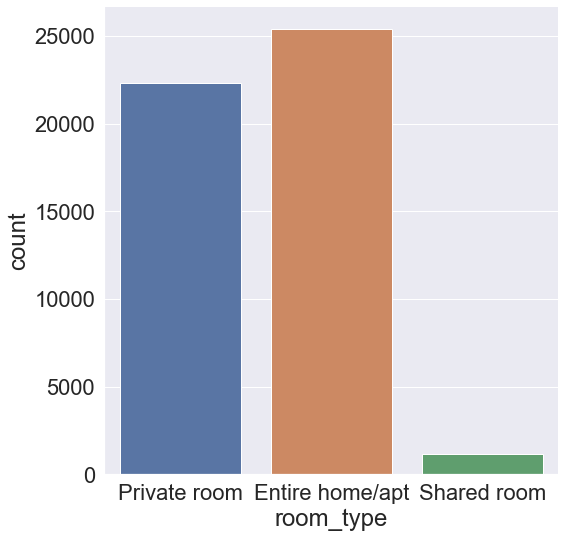

In [149]:
sns.catplot('room_type', data=abb_vis_df, kind = 'count', height =8, aspect = 1)

<BarContainer object of 10 artists>

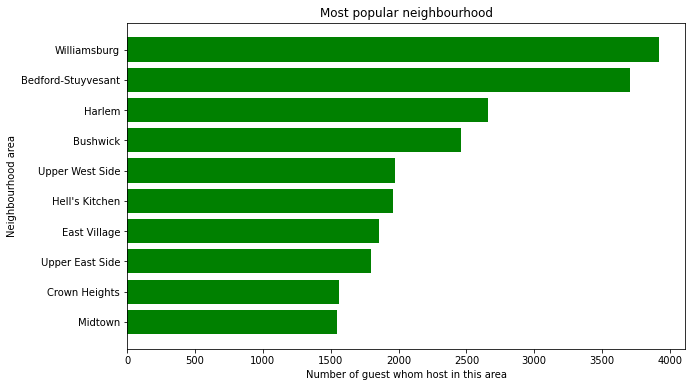

In [140]:
#The most popular neigbourhood
data = abb_vis_df.neighbourhood.value_counts()[:10]
plt.figure(figsize=(10,6))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular neighbourhood")
plt.xlabel("Number of guest whom host in this area")
plt.ylabel("Neighbourhood area")

plt.barh(x, y, color = 'green')


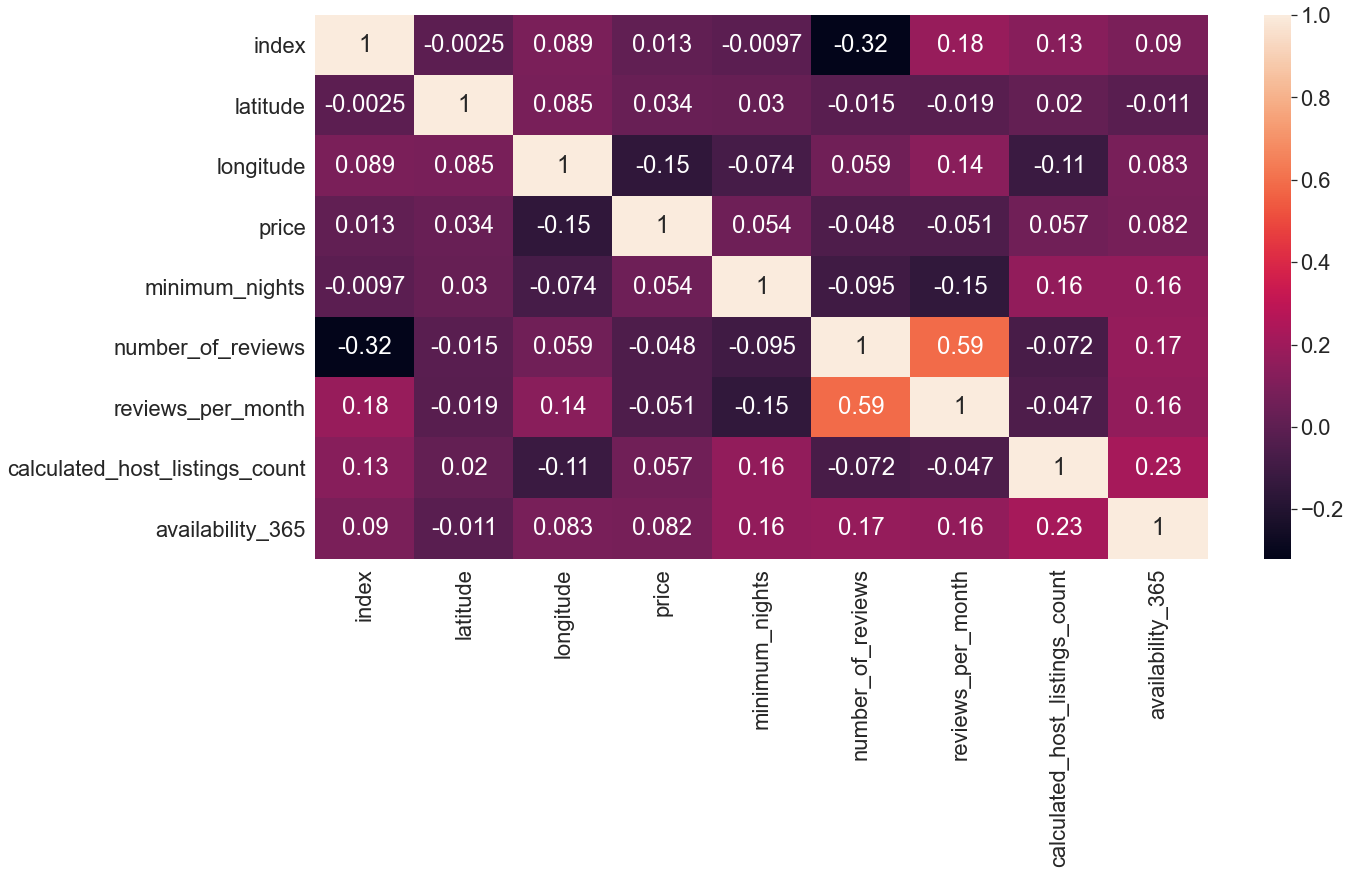

In [141]:
# Corrlation matric
sns.set(font_scale =2)
plt.figure(figsize =(20, 10))
sns.heatmap(abb_vis_df.corr(), annot=True)

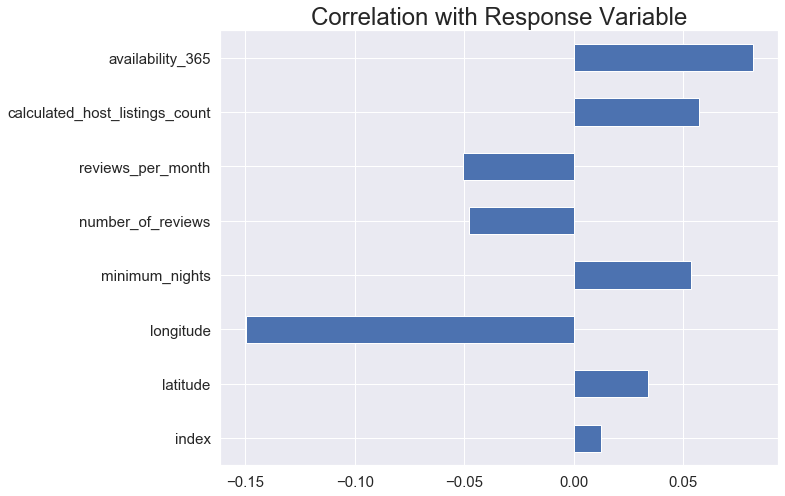

In [150]:
#All other feature correlation with price
abb_vis_df.drop('price', axis=1).corrwith(abb_vis_df.price).plot.barh(figsize=(10, 8),
                                    title='Correlation with Response Variable', fontsize=15, grid=True)